Sawyer Byrd

MSML602

# Final Tutorial

In [1]:
# Imports
import pandas as pd
import numpy as np
import datetime as dt

## 1.) Collect Data

The data I will be using in this project contains 45,000 movies from the MovieLens dataset. It also contains 26 milion ratings from 270,000 users. This dataset can be found here: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=credits.csv

I will be using a smaller subset of this data because my computer and IDE can't handle that much data. The movie data is contained within movies_metadata.csv and includes 24 features, some numeric and some text based. Since you cannot pass text based values into a model, these features will have to be addressed and converted. Later in the project, when we are cleaning the data, I will talk about the different methods to schieve this and which one's I chose.

Since the data comes in csv files, we can go ahead and read them straight into a pandas dataframe using pd.read_csv. This will make it easier to look at and clean the data

In [2]:
df_links_small = pd.read_csv('./Movie_Show_Data/links_small.csv')
df_movies_metadata = pd.read_csv('./Movie_Show_Data/movies_metadata.csv', low_memory=True)
df_ratings = pd.read_csv('./Movie_Show_Data/ratings_small.csv', low_memory=True)

/tmp/ipykernel_52478/2570157097.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_metadata = pd.read_csv('./Movie_Show_Data/movies_metadata.csv', low_memory=True)


A Pandas dataframe is esentially a matrix with extra functionality built in. When using it for data and feature representation, each row represents an observation and columns represent the features. The dataframe allows us to name each column and keep an index for the rows. The built in functions will come in handy when displaying and manipulating the data.

Ok, now that we have the data, we can take a look at it. What I will do next is print the first 5 rows of each dataframe and drop the columns that we won't need

In [3]:
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### The movie metadata contains lots of features and multiple different types. Lets go over some of them and make a rough plan of what to do.

Firstly, I see some boolean data. These are tho columns that contain the value True or False. These columns should be easy to convert to numeric format by just representing True with 1 and False with 0.

I also see some columns that are just text. A lot of these columns we won't need or can't use. For example, the title of a movie is entirely unique to each observation. This could allow the model to learn a 1 to 1 representation between specific movies and their ratings. For this project, we want the model to learn the representation between the details/meta data of a movie, and what a user will rate it.

One type of feature that stood out to me was the dictionary or list features such as 'genres'. This seem to follow a structure including some sort of value(s) as well as individual ID(s) for each value. This makes it easier to do things like feature encoding. However, that is out of the scope for this project so I will be exploring other methods of converting this data into numerical representation.


##### We will explore each specific feature more in the next section as we scrub the data.

## 2.) Data Scrubbing

Now, let's look at the feature information. DataFrame.info() shows us the number of entries, number of columns, name of each column, not null count, and data type of each column. This will be useful for making sense of the data.

In [4]:
df_movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Dropping Features

From the data above, there is a few features we can drop. Here are some of those columns and why:

##### homepage: 
this column just includes links to the websites for the movie if it has one. This should not affect the rating of a movie.

##### original_title: 
While the title surely has an effect on how many people see the movie and how it is percieved, this relationship would simply be too hard to represent numerically.

##### overview: 
Just like original_title, this would be very difficult to account for in a prediction model.

##### poster_path: 
This is a jpg image which will also be too hard to represent in a prediction model, as well as the subjective relationship between it and the perception.

##### spoken_languages
Since we are already including one lagnuage feature, I feel it's redundant to include a second one.

##### tagline:
This will be very hard to represent numerically for our classifier.

##### title:
This is unique to each movie so it can't be used for predictions.

##### video:
We don't need to include a video in our feature representation.

##### vote_average and vote_count:
Not sure what these mean and the data description does not say either so we will exclude these for now.

##### imbd_id:
We shouldn't need this for this project

In [5]:
# dropping all the columns we won't use
df_movies_metadata = df_movies_metadata.drop(columns=['homepage', 'original_title', 'overview', 'poster_path', 'video', 'vote_count', 'vote_average', 'tagline', 'spoken_languages', 'title'])

In [6]:
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released


### Cleaning

#### Status

One feature that I wanted to look at more closely was status. I'm not sure what values this can take and if they relate to other features.

Let's start by checking what values it can take.

In [7]:
df_movies_metadata['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

So we can see that some of these values mean the movie was unreleased. This means a full audience would not be able to see them, if an audience at all. I would just like to look at movies that have been released so lets drop all observations that are not classified as released and then drop the status column.

Pandas makes this easy by just selecting only observations (rows) where the value for 'status' equals 'Released'. Then we can use df.drop() to drop the 'status' column.

In [8]:
df_movies_metadata = df_movies_metadata[df_movies_metadata['status'] == 'Released']
df_movies_metadata = df_movies_metadata.drop(columns=['status'])
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0


#### Release Date

Ok, now to make this a bit easier computationaly, I would like to only consider the most recent 15 years of movies. To do this we can take advantage of pandas and datetime.

In [9]:
# converting 'release_date' to datetime
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'])

# droping everything but the most recent 20 years WITHIN the dataset
# since the dataset stops in 2017, this will not be exactly 20 years from today
most_recent_date = df_movies_metadata['release_date'].max()
df_movies_metadata = df_movies_metadata[df_movies_metadata['release_date'].dt.year >= (most_recent_date.year - 20)]

In [10]:
df_movies_metadata['release_date'].dt.year.unique()

array([1997, 2002, 1998, 2010, 2013, 1999, 2012, 2000, 2001, 2011, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2014, 2016, 2015, 2017],
      dtype=int32)

Ok now we can change release_date to a numeric format. To do this while still recognizing the difference between day, months, and years, we seperate the date into seperate features for each component.

In [11]:
df_movies_metadata['release_year'] = df_movies_metadata['release_date'].dt.year
df_movies_metadata['release_month'] = df_movies_metadata['release_date'].dt.month
df_movies_metadata['release_day'] = df_movies_metadata['release_date'].dt.day

# dropping 'release_date' now that we have year, month, day
df_movies_metadata.drop(columns=['release_date'], inplace=True)
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,release_year,release_month,release_day
55,False,NaN,0,[],124057,tt0113541,en,0.307075,"[{'name': 'Telefilm Canada', 'id': 7320}, {'na...",[],0.0,89.0,1997,7,8
390,False,NaN,0,[],267188,tt0112849,en,0.251223,[],[],0.0,97.0,1997,12,31
707,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",131232,tt0333373,en,0.003949,[],"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",0.0,86.0,2002,3,20
759,False,NaN,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,113.0,1997,5,30
844,False,NaN,53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,94.0,1997,5,30


### Datatypes

Ok, so now we can start looking at each column and convert them to a numerical format.

#### Adult

First let's look at the 'adult' column. This is a boolean value so we can simply apply 1 to true and 0 to false.

In [12]:
# converting 'adult' to binary
df_movies_metadata['adult'] = df_movies_metadata['adult'].map({'True': 1, 'False': 0})
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,release_year,release_month,release_day
55,0,NaN,0,[],124057,tt0113541,en,0.307075,"[{'name': 'Telefilm Canada', 'id': 7320}, {'na...",[],0.0,89.0,1997,7,8
390,0,NaN,0,[],267188,tt0112849,en,0.251223,[],[],0.0,97.0,1997,12,31
707,0,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",131232,tt0333373,en,0.003949,[],"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",0.0,86.0,2002,3,20
759,0,NaN,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,113.0,1997,5,30
844,0,NaN,53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,94.0,1997,5,30


#### belongs_to_collection

Next, lets look at the 'belongs_to_collection' category. I feel like this can also be represented as binary because for this project, it does not seem necisary to include the specific collection of each movie.

In [13]:
# if 'belongs_to_collection' is NaN, then the movie does not belong to a collection, else it does
df_movies_metadata['belongs_to_collection'] = df_movies_metadata['belongs_to_collection'].notnull().map({True: 1, False: 0})
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,release_year,release_month,release_day
55,0,0,0,[],124057,tt0113541,en,0.307075,"[{'name': 'Telefilm Canada', 'id': 7320}, {'na...",[],0.0,89.0,1997,7,8
390,0,0,0,[],267188,tt0112849,en,0.251223,[],[],0.0,97.0,1997,12,31
707,0,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",131232,tt0333373,en,0.003949,[],"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",0.0,86.0,2002,3,20
759,0,0,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,113.0,1997,5,30
844,0,0,53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,94.0,1997,5,30


#### Budget

We can already see above that the budget column contains some entries with a 0 budget. This could either mean that the movie had no budget, or more realistically, the data for that entry is just missing. For the purposes of this assignment, we will just drop the observations withought budget data. I'm doing this because a budget of 0 seems unreasonable and without that information, it might negatively skew our data or learning algorithm.

Note: There are other techniques that can be used to substitute values for this missing data based on the pattern of missigness. However, for the scope of this project, we will just drop the observations with missing budget values.

In [14]:
# dropping observations with 0 for budget
df_movies_metadata = df_movies_metadata[df_movies_metadata['budget'].astype(float) > 0]

# converting budget to numeric
df_movies_metadata['budget'] = pd.to_numeric(df_movies_metadata['budget'])
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,runtime,release_year,release_month,release_day
759,0,0,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,113.0,1997,5,30
844,0,0,53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,94.0,1997,5,30
853,0,0,60000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",11015,tt0120004,en,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",33956608.0,110.0,1997,1,10
1025,0,0,45000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",38153,tt0120107,en,3.733574,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2154540.0,103.0,1997,1,31
1374,0,1,55000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",34314,tt0120390,en,5.304043,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",11466088.0,100.0,1997,1,9


#### Genres

Lets look at the genres column now. We can already see that there are at least 10751 genres which is way to many to hot encode. That would make computation rediculously expensive. Because of this, lets maybe pick the top 20 genres and hot encode that.

Note: Some movies have more than one genre and after limiting to the top 20, some might not have any genres.

In [15]:
# pick the top 20 genres
from collections import Counter
import ast

genre_counter = Counter()
for genres in df_movies_metadata['genres']:
    for genre in ast.literal_eval(genres):
        genre_counter[genre['name']] += 1
genre_counter.most_common(20)

[('Drama', 2969),
 ('Comedy', 2044),
 ('Thriller', 1753),
 ('Action', 1537),
 ('Romance', 1026),
 ('Adventure', 873),
 ('Crime', 865),
 ('Horror', 808),
 ('Science Fiction', 651),
 ('Family', 528),
 ('Fantasy', 502),
 ('Mystery', 463),
 ('Animation', 334),
 ('History', 257),
 ('Documentary', 210),
 ('War', 197),
 ('Music', 164),
 ('Foreign', 108),
 ('Western', 61),
 ('TV Movie', 29)]

Ok, now lets one hot encode this. One hot encoding is a technique that converts categorical data into numerical by using a binary vector for each category. Usually, there is a single 1 in the entry that cooresponds to the category of that feature. In our case, a feature might coorespond to multiple categories.

In [16]:
# one hot encoding the top 20 genres
top_20_genres = [genre for genre, count in genre_counter.most_common(20)]
for genre in top_20_genres:
    # applying 1 if the genre is present in the genres list, else 0
    df_movies_metadata[genre] = df_movies_metadata['genres'].apply(lambda x: 1 if genre in [g['name'] for g in ast.literal_eval(x)] else 0)
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,...,Fantasy,Mystery,Animation,History,Documentary,War,Music,Foreign,Western,TV Movie
759,0,0,1000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
844,0,0,53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
853,0,0,60000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",11015,tt0120004,en,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",...,0,1,0,0,0,0,0,0,0,0
1025,0,0,45000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",38153,tt0120107,en,3.733574,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
1374,0,1,55000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",34314,tt0120390,en,5.304043,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0


In [17]:
# dropping the original 'genres' column
df_movies_metadata = df_movies_metadata.drop(columns=['genres'])

Now since we droped the majority of genres, there might be some movies that don't have their genre included. For this project, we will just drop those observations.

Note: This isn't exactly the best practice, however it helps reduce the number of observations which will help reduce the computation time later in the project.

The best practice would be to explore the relation between the observations that are missing genres and decide if they are coorelated to any other features. If they are, then maybe we would be able to perform imputation to replace them.

In [18]:
print('Number of movies before dropping those without top 20 genres:', df_movies_metadata.shape[0])
# dropping the observations that have 0 for all of the top 20 genres
df_movies_metadata = df_movies_metadata[df_movies_metadata[top_20_genres].sum(axis=1) > 0]
print('Number of movies after dropping those without top 20 genres:', df_movies_metadata.shape[0])

Number of movies before dropping those without top 20 genres: 6340
Number of movies after dropping those without top 20 genres: 6295


Ok cool, seems like we only lost a little under 50 observations.

#### production_companies

Let's look at 'production_companies' now. We can see already from the head that there are at least 7320 unique values for this. So once again, let's pick the top 50 and one hot encode. But this time I fear we might loose significantly more observations. In that case we might want to not just drop all the columns that don;t have production companies in the top 50.

In [19]:
# lets make a copy of the dataframe to work with for production companies
df_movies_metadata_pc = df_movies_metadata.copy()

# picking the top 50 production companies
prod_company_counter = Counter()
for prod_companies in df_movies_metadata_pc['production_companies']:
    for company in ast.literal_eval(prod_companies):
        prod_company_counter[company['name']] += 1
top_50_prod_companies = [company for company, count in prod_company_counter.most_common(50)]
top_50_prod_companies[:5] # only listing the first 5

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures']

In [20]:
# one hot encoding the top 50 production companies
for company in top_50_prod_companies:
    df_movies_metadata_pc[company] = df_movies_metadata_pc['production_companies'].apply(lambda x: 1 if company in [c['name'] for c in ast.literal_eval(x)] else 0)
df_movies_metadata_pc.head()

,adult,belongs_to_collection,budget,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,...,Film4,Imagine Entertainment,Revolution Studios,UK Film Council,Scott Free Productions,Original Film,TSG Entertainment,DreamWorks Animation,Wild Bunch,CinéCinéma
759,0,0,1000000,32872,tt0118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,53000000,9054,tt0119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,...,0,0,0,0,0,0,0,0,0,0
853,0,0,60000000,11015,tt0120004,en,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",33956608.0,...,0,0,0,0,0,0,0,0,0,0
1025,0,0,45000000,38153,tt0120107,en,3.733574,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2154540.0,...,0,0,0,0,0,0,0,0,0,0
1374,0,1,55000000,34314,tt0120390,en,5.304043,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",11466088.0,...,0,0,0,0,0,0,0,0,0,0


let's also remove the observations that aren't included in the top 20 production companies.

In [21]:
# removing any observations with no production company from the top 50
print('Number of movies before dropping those without top 50 production companies:', df_movies_metadata_pc.shape[0])
df_movies_metadata_pc = df_movies_metadata_pc[df_movies_metadata_pc[top_50_prod_companies].sum(axis=1) > 0]
print('Number of movies after dropping those without top 50 production companies:', df_movies_metadata_pc.shape[0])

Number of movies before dropping those without top 50 production companies: 6295
Number of movies after dropping those without top 50 production companies: 2615


Hmmmm. Seems like this excudes the majority of the observations. Might not be a good plan then. In that case, we can try a different tactic. Instead of one hot encoding, lets add a frequency encoding. That means we will include the frequency of each films main studio, within the dataset, as a feature. The frequency is defined as how many times it apears within our data, divided by the total number of observations.

In [22]:
# creating a feature for the main production studio and its frequency
df_movies_metadata['main_studio'] = df_movies_metadata['production_companies'].apply(
    # only take the first production company listed as the main studio
    lambda x: eval(x)[0]['name'] if pd.notnull(x) and len(eval(x)) > 0 else 'Unknown'
)

# creating a feature for the frequency of the main production studio
studio_counts = df_movies_metadata['main_studio'].value_counts()
df_movies_metadata['studio_freq'] = df_movies_metadata['main_studio'].map(studio_counts / len(df_movies_metadata))

Awesome, now we don't even have to exclude any observations and that column is already normalized.

Now we can drop the old columns.

In [23]:
# dropping unnecessary columns
df_movies_metadata = df_movies_metadata.drop(columns=['production_companies', 'main_studio'])
df_movies_metadata.head()

,adult,belongs_to_collection,budget,id,imdb_id,original_language,popularity,production_countries,revenue,runtime,...,Mystery,Animation,History,Documentary,War,Music,Foreign,Western,TV Movie,studio_freq
759,0,0,1000000,32872,tt0118523,en,2.700061,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,113.0,...,0,0,0,0,0,0,0,0,0,0.032407
844,0,0,53000000,9054,tt0119214,en,2.289647,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,94.0,...,0,0,0,0,0,0,0,0,0,0.000953
853,0,0,60000000,11015,tt0120004,en,7.699967,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",33956608.0,110.0,...,1,0,0,0,0,0,0,0,0,0.032407
1025,0,0,45000000,38153,tt0120107,en,3.733574,"[{'iso_3166_1': 'US', 'name': 'United States o...",2154540.0,103.0,...,0,0,0,0,0,0,0,0,0,0.001271
1374,0,1,55000000,34314,tt0120390,en,5.304043,"[{'iso_3166_1': 'US', 'name': 'United States o...",11466088.0,100.0,...,0,0,0,0,0,0,0,0,0,0.003495


#### Production Countries

The production_countries column is organized very similarly to how production_companies was. In that case, we can do the same type of frequency encoding.

In [24]:
# frequency encoding the production countries
# creating a feature for the main production country and its frequency
df_movies_metadata['main_country'] = df_movies_metadata['production_countries'].apply(
    # only take the first country listed as the main country
    lambda x: eval(x)[0]['name'] if pd.notnull(x) and len(eval(x)) > 0 else 'Unknown'
)

# creating a feature for the frequency of the main production country
country_counts = df_movies_metadata['main_country'].value_counts()
df_movies_metadata['country_freq'] = df_movies_metadata['main_country'].map(country_counts / len(df_movies_metadata))


In [25]:
# dropping the unused production_countries columns
df_movies_metadata = df_movies_metadata.drop(columns=['production_countries', 'main_country'])
df_movies_metadata.head()

,adult,belongs_to_collection,budget,id,imdb_id,original_language,popularity,revenue,runtime,release_year,...,Animation,History,Documentary,War,Music,Foreign,Western,TV Movie,studio_freq,country_freq
759,0,0,1000000,32872,tt0118523,en,2.700061,0.0,113.0,1997,...,0,0,0,0,0,0,0,0,0.032407,0.507228
844,0,0,53000000,9054,tt0119214,en,2.289647,0.0,94.0,1997,...,0,0,0,0,0,0,0,0,0.000953,0.507228
853,0,0,60000000,11015,tt0120004,en,7.699967,33956608.0,110.0,1997,...,0,0,0,0,0,0,0,0,0.032407,0.043209
1025,0,0,45000000,38153,tt0120107,en,3.733574,2154540.0,103.0,1997,...,0,0,0,0,0,0,0,0,0.001271,0.507228
1374,0,1,55000000,34314,tt0120390,en,5.304043,11466088.0,100.0,1997,...,0,0,0,0,0,0,0,0,0.003495,0.507228


#### Original Language

Lets first see what values this column can take

In [26]:
df_movies_metadata['original_language'].unique()

array(['en', 'de', 'cn', 'nl', 'fa', 'it', 'pt', 'da', 'fr', 'es', 'ja',
       'zh', 'bs', 'cs', 'ko', 'ru', 'hi', 'pl', 'ps', 'fi', 'sv', 'hu',
       'he', 'sr', 'af', 'th', 'bo', 'ro', 'vi', 'ca', 'bm', 'no', 'tr',
       'ta', 'bg', 'nb', 'id', 'el', 'ku', 'ml', 'lo', 'xx', 'kn', 'is',
       'lv', 'sl', 'et', 'mr', 'sq', 'te', 'ar', 'uk', 'ur'], dtype=object)

Ok, we can see that this might be too many to hot encode. However, it might include some valuble information for prediction. So we will frequency encode this as well.

In [27]:
# marking any missing languages as 'unknown'
df_movies_metadata['language'] = df_movies_metadata['original_language'].fillna('unknown').str.lower().str.strip()

# frequency encoding
language_freq = df_movies_metadata['language'].value_counts() / len(df_movies_metadata)
df_movies_metadata['language_freq'] = df_movies_metadata['language'].map(language_freq)

# handle any new/unknown languages
df_movies_metadata['language_freq'].fillna(language_freq.mean(), inplace=True)

/tmp/ipykernel_52478/2920063559.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_movies_metadata['language_freq'].fillna(language_freq.mean(), inplace=True)


Sweet, now we can drop unnecessary cols

In [28]:
# dropping the unnecessary columns
df_movies_metadata = df_movies_metadata.drop(columns=['original_language', 'language'])
df_movies_metadata.head()

,adult,belongs_to_collection,budget,id,imdb_id,popularity,revenue,runtime,release_year,release_month,...,History,Documentary,War,Music,Foreign,Western,TV Movie,studio_freq,country_freq,language_freq
759,0,0,1000000,32872,tt0118523,2.700061,0.0,113.0,1997,5,...,0,0,0,0,0,0,0,0.032407,0.507228,0.798411
844,0,0,53000000,9054,tt0119214,2.289647,0.0,94.0,1997,5,...,0,0,0,0,0,0,0,0.000953,0.507228,0.798411
853,0,0,60000000,11015,tt0120004,7.699967,33956608.0,110.0,1997,1,...,0,0,0,0,0,0,0,0.032407,0.043209,0.798411
1025,0,0,45000000,38153,tt0120107,3.733574,2154540.0,103.0,1997,1,...,0,0,0,0,0,0,0,0.001271,0.507228,0.798411
1374,0,1,55000000,34314,tt0120390,5.304043,11466088.0,100.0,1997,1,...,0,0,0,0,0,0,0,0.003495,0.507228,0.798411


### Checking DataTypes

Ok awesome, we should have all our data in numeric format but let's double check.

In [29]:
df_movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6295 entries, 759 to 45422
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6295 non-null   int64  
 1   belongs_to_collection  6295 non-null   int64  
 2   budget                 6295 non-null   int64  
 3   id                     6295 non-null   object 
 4   imdb_id                6295 non-null   object 
 5   popularity             6295 non-null   object 
 6   revenue                6295 non-null   float64
 7   runtime                6290 non-null   float64
 8   release_year           6295 non-null   int32  
 9   release_month          6295 non-null   int32  
 10  release_day            6295 non-null   int32  
 11  Drama                  6295 non-null   int64  
 12  Comedy                 6295 non-null   int64  
 13  Thriller               6295 non-null   int64  
 14  Action                 6295 non-null   int64  
 15  Romanc

Good thing we checked! We still need to convert popularity and id columns to numeric. We will keep id and imdb_id as an object for comparisons with the ratings and links database.

In [30]:
# converting budget and popularity to numeric
df_movies_metadata['id'] = pd.to_numeric(df_movies_metadata['id']).fillna(0)
df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity']).fillna(0)
df_movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6295 entries, 759 to 45422
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6295 non-null   int64  
 1   belongs_to_collection  6295 non-null   int64  
 2   budget                 6295 non-null   int64  
 3   id                     6295 non-null   int64  
 4   imdb_id                6295 non-null   object 
 5   popularity             6295 non-null   float64
 6   revenue                6295 non-null   float64
 7   runtime                6290 non-null   float64
 8   release_year           6295 non-null   int32  
 9   release_month          6295 non-null   int32  
 10  release_day            6295 non-null   int32  
 11  Drama                  6295 non-null   int64  
 12  Comedy                 6295 non-null   int64  
 13  Thriller               6295 non-null   int64  
 14  Action                 6295 non-null   int64  
 15  Romanc

### Dealing with NaN values

There are a multiple ways to deal with NaN values. I mentioned before, the correct strategy would probably be to use imputation besed on the relationship between missing values and the rest of the data. However, another strategy is to just drop observations with NaN values. That is what we will be doing today for simplicity.

In [31]:
# dropping rows with NaN values
df_movies_metadata = df_movies_metadata.dropna()
df_movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6290 entries, 759 to 45422
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6290 non-null   int64  
 1   belongs_to_collection  6290 non-null   int64  
 2   budget                 6290 non-null   int64  
 3   id                     6290 non-null   int64  
 4   imdb_id                6290 non-null   object 
 5   popularity             6290 non-null   float64
 6   revenue                6290 non-null   float64
 7   runtime                6290 non-null   float64
 8   release_year           6290 non-null   int32  
 9   release_month          6290 non-null   int32  
 10  release_day            6290 non-null   int32  
 11  Drama                  6290 non-null   int64  
 12  Comedy                 6290 non-null   int64  
 13  Thriller               6290 non-null   int64  
 14  Action                 6290 non-null   int64  
 15  Romanc

### Cleaning NaN Values

Last but not least for cleaning the features will be to check the NaN (missing) values. Lets check how many each column has.

In [32]:
# checking how many NaN values in each col
df_movies_metadata.isnull().sum()[df_movies_metadata.isnull().sum() > 0]

Series([], dtype: int64)

Seems like there are still some observations with missing run times. Since it is only 5 observations, dropping them shouldn't affect our data in a meaningfull way.

In [33]:
# dropping cols will missing values (should be in runtime)
df_movies_metadata = df_movies_metadata.dropna()

Ok, lets check one more time.

In [34]:
df_movies_metadata.isnull().sum()[df_movies_metadata.isnull().sum() > 0]

Series([], dtype: int64)

Looks good!

### Transforming Data For Model

Great, now we can transform the data to what we will need for our model. To pass data into a model, we need only numeric values. Also, we need to match up each observation with it's cooresponding class/true value (in our case, ratings). In the case of this project, the relationships between data and expected output is a little more complicated. We will explore this later.

To start, let's select only numeric features. This should be all features since we converted everything to numeric

In [35]:
movie_features = df_movies_metadata.select_dtypes(include=[np.number])
movie_features.set_index('id', inplace=True)
movie_features.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,release_year,release_month,release_day,Drama,...,History,Documentary,War,Music,Foreign,Western,TV Movie,studio_freq,country_freq,language_freq
id,,,,,,,,,,,,,,,,,,,,,
32872,0,0,1000000,2.700061,0.0,113.0,1997,5,30,0,...,0,0,0,0,0,0,0,0.032407,0.507228,0.798411
9054,0,0,53000000,2.289647,0.0,94.0,1997,5,30,0,...,0,0,0,0,0,0,0,0.000953,0.507228,0.798411
11015,0,0,60000000,7.699967,33956608.0,110.0,1997,1,10,0,...,0,0,0,0,0,0,0,0.032407,0.043209,0.798411
38153,0,0,45000000,3.733574,2154540.0,103.0,1997,1,31,0,...,0,0,0,0,0,0,0,0.001271,0.507228,0.798411
34314,0,1,55000000,5.304043,11466088.0,100.0,1997,1,9,0,...,0,0,0,0,0,0,0,0.003495,0.507228,0.798411


In [36]:
movie_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6290 entries, 32872 to 63898
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6290 non-null   int64  
 1   belongs_to_collection  6290 non-null   int64  
 2   budget                 6290 non-null   int64  
 3   popularity             6290 non-null   float64
 4   revenue                6290 non-null   float64
 5   runtime                6290 non-null   float64
 6   release_year           6290 non-null   int32  
 7   release_month          6290 non-null   int32  
 8   release_day            6290 non-null   int32  
 9   Drama                  6290 non-null   int64  
 10  Comedy                 6290 non-null   int64  
 11  Thriller               6290 non-null   int64  
 12  Action                 6290 non-null   int64  
 13  Romance                6290 non-null   int64  
 14  Adventure              6290 non-null   int64  
 15  Crim

Great! Now we can look at the ratings which will be what we are trying to predict (given a specific user) and match them up with our observations.

In [37]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [38]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Firstly, we should be able to get rid of the timestamp column

In [39]:
df_ratings.drop(columns=['timestamp'], inplace=True)
df_ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


Next, we want to join the 2 datasets. We can do this by using inner join which will only keep the observations that are in both.

In [40]:
# inner join the 2 datasets on id/movieId to keep only ratings for movies present in the metadata
df_ratings_filtered = pd.merge(
    df_ratings,
    df_movies_metadata[['id']],  # Only need ID column for merging
    left_on='movieId',
    right_on='id',
    how='inner'
)

# drop the duplicate ID column
df_ratings_filtered = df_ratings_filtered.drop(columns=['id'])

print(f"Ratings after inner join: {df_ratings_filtered.shape}")
print(f"Unique movies after join: {df_ratings_filtered['movieId'].nunique()}")

Ratings after inner join: (14329, 3)
Unique movies after join: 710


In [41]:
df_ratings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14329 entries, 0 to 14328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   14329 non-null  int64  
 1   movieId  14329 non-null  int64  
 2   rating   14329 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 336.0 KB


### Label Encoding

Now we will encode the users and movies using LabelEncoder. What this does is assign each user a unique number, as well as each movie. We have to do this because each user has multiple ratings for multiple different movies, and each movie has multiple different ratings from multiple different users. This way, each user-movie pair has a unique observation.

In [42]:
from sklearn.preprocessing import LabelEncoder

# encoding userId and movieId
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

df_ratings_filtered['user_encoded'] = user_encoder.fit_transform(df_ratings_filtered['userId'])
df_ratings_filtered['movie_encoded'] = movie_encoder.fit_transform(df_ratings_filtered['movieId'])

# getting unique counts
num_users = df_ratings_filtered['user_encoded'].nunique()
num_movies = df_ratings_filtered['movie_encoded'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")
print(f"Total ratings: {len(df_ratings_filtered)}")

Number of unique users: 668
Number of unique movies: 710
Total ratings: 14329


Next, we can align the movie features with the encoding. This way, when we pass them into our model, everything is at the same indicies as each other and each user-movie pair matches up with it's respective rating

In [43]:
rated_movie_ids = movie_encoder.classes_

unique_movie_ids = list(dict.fromkeys(rated_movie_ids)) 

movie_feat_aligned = movie_features.loc[unique_movie_ids].reset_index(drop=True)

Just in case, lets check for duplicate movies

In [44]:
duplicate_indices = movie_features.index[movie_features.index.duplicated()]
print(f"Duplicate indices in movie_features: {len(duplicate_indices)}")

# Show the duplicates if any
if len(duplicate_indices) > 0:
    print("Duplicate indices:", duplicate_indices[:10])

Duplicate indices in movie_features: 8
Duplicate indices: Index([14788, 13209, 77221, 110428, 15028, 4912, 298721, 10991], dtype='int64', name='id')


Would you look at that, there are some duplicates. So now we need to remove them.

In [45]:
# Selecting observations without duplicates
movie_features_unique = movie_features[~movie_features.index.duplicated(keep='first')]
# re-aligning after removing duplicates
movie_feat_aligned = movie_features_unique.loc[unique_movie_ids].reset_index(drop=True)

print(f"Original movie_features shape: {movie_features.shape}")
print(f"After removing duplicates: {movie_features_unique.shape}")
print(f"Aligned features shape: {movie_feat_aligned.shape}")
print(f"Matches num_movies (710)? {movie_feat_aligned.shape[0] == num_movies}")

Original movie_features shape: (6290, 32)
After removing duplicates: (6282, 32)
Aligned features shape: (710, 32)
Matches num_movies (710)? True


### Preparing movie feature array

We need to match the index order of movie meta data with the movie encoder class. Also, we need to get the features from the cleaned meta data and convert it to a numpy array.

In [46]:
# matching movie features to encoder order
movie_id_order = movie_encoder.classes_

# get features for these movies from cleaned metadata
movie_features = []

for movie_id in movie_id_order:
    # find this movie in your cleaned metadata
    movie_row = df_movies_metadata[df_movies_metadata['id'] == movie_id]
    
    if not movie_row.empty:
        # get only the number columns (skip 'id' and 'imdb_id')
        features = movie_row.select_dtypes(include=['number']).iloc[0].values
        # remove the 'id' value if it's included
        features = features[1:] if len(features) > 0 else []
        movie_features.append(features)
    else:
        # if movie not found, use zeros
        movie_features.append([0] * 32)  # 32 is the feature count

# convert to numpy array
movie_features_array = np.array(movie_features)

Next, we will split the data into user data, movie data, and the ratings (output).

In [47]:
X_user = df_ratings_filtered['user_encoded'].values
X_movie = df_ratings_filtered['movie_encoded'].values
y = df_ratings_filtered['rating'].values

print(f"User IDs: {X_user.shape}")
print(f"Movie IDs: {X_movie.shape}")
print(f"Ratings: {y.shape}")

User IDs: (14329,)
Movie IDs: (14329,)
Ratings: (14329,)


Lets prepare a quick lookup for our encoded_movie_id to features

In [48]:
feature_lookup = {}
for encoded_id in range(len(movie_features_array)):
    feature_lookup[encoded_id] = movie_features_array[encoded_id]

Now we can get our features for each movie and split into train and test set. We will do and 80/20 split for this project. That is, 80% of the data will be used to train the model and 20% will be used to test it. We also want to split the training data into training and validation sets. This means that the training data can also be used for validation during training and the test data will only be used to test.

One more very important thing is to standardize our features. Without doing this, a feature like budget will have values like 10,000,000 while features like adult are binary. Standardizing makes it easier for our model to learn.

In [49]:
X_features = np.array([feature_lookup[mid] for mid in X_movie])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# splitting data into training and test sets
(X_user_train, X_user_test, 
 X_movie_train, X_movie_test, 
 X_features_train, X_features_test,
 y_train, y_test) = train_test_split(
    X_user, X_movie, X_features, y,
    test_size=0.2,  # 20% for testing
    random_state=42
)
 
(X_user_train, X_user_val, 
X_movie_train, X_movie_val, 
X_features_train, X_features_val, 
y_train, y_val) = train_test_split(
    X_user_train, X_movie_train, X_features_train, y_train,
    test_size=0.25,  # 25% of 80% = 20% of original data for validation
    random_state=42
)

# create scaler
scaler = StandardScaler()

# fit on training features and transform both training and test features
X_features_train_scaled = scaler.fit_transform(X_features_train)
X_features_val_scaled = scaler.transform(X_features_val)  # using same scaler, don't fit
X_features_test_scaled = scaler.transform(X_features_test)  # using same scaler, don't fit

# check scaling worked
print(f"\nFeature scaling check:")
print(f"Train features - Mean: {X_features_train_scaled.mean():.4f}, Std: {X_features_train_scaled.std():.4f}")
print(f"Val features - Mean: {X_features_val_scaled.mean():.4f}, Std: {X_features_val_scaled.std():.4f}")
print(f"Test features - Mean: {X_features_test_scaled.mean():.4f}, Std: {X_features_test_scaled.std():.4f}")


Feature scaling check:
Train features - Mean: 0.0000, Std: 1.0000
Val features - Mean: 0.0038, Std: 1.0391
Test features - Mean: -0.0015, Std: 1.0079


Awesome! The data should be ready to explore now!

## 3.) Explore Data

Lets print out the data one more time and take a look

In [50]:
movie_feat_aligned.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,release_year,release_month,release_day,Drama,...,History,Documentary,War,Music,Foreign,Western,TV Movie,studio_freq,country_freq,language_freq
0,0,1,94000000,25.497794,940335536.0,100.0,2003,5,30,0,...,0,0,0,0,0,0,0,0.000477,0.507228,0.798411
1,0,0,15000000,20.726578,356296601.0,122.0,1999,9,15,1,...,0,0,0,0,0,0,0,0.010008,0.507228,0.798411
2,0,1,12800000,10.684806,40031879.0,140.0,2000,5,17,1,...,0,0,0,1,0,0,0,0.001906,0.003177,0.798411
3,0,0,90000000,24.305260,263920180.0,126.0,1997,5,7,0,...,0,0,0,0,0,0,0,0.027164,0.050357,0.798411
4,0,1,140000000,47.326665,655011224.0,143.0,2003,7,9,0,...,0,0,0,0,0,0,0,0.019698,0.507228,0.798411


The model I will be building will predict what a specific user will rate a specific movie, given their previous ratings and the movie data. So for this part of the project, I would like to look at other aspects of the data. One aspect I am interested in is the relation between revenue and other features. Specifically, what features lead to higher revenue for a movie?

The most obvious indicator in my head is the budget. So let's take a look at that first.

First, let's print out some of the statistics of the budgets and revenues.

In [51]:
print(f"\nBudget Statistics:")
print(f"Mean: ${movie_feat_aligned['budget'].mean():,.0f}")
print(f"Median: ${movie_feat_aligned['budget'].median():,.0f}")
print(f"Max: ${movie_feat_aligned['budget'].max():,.0f}")
print(f"\nRevenue Statistics:")
print(f"Mean: ${movie_feat_aligned['revenue'].mean():,.0f}")
print(f"Median: ${movie_feat_aligned['revenue'].median():,.0f}")
print(f"Max: ${movie_feat_aligned['revenue'].max():,.0f}")


Budget Statistics:
Mean: $43,742,391
Median: $26,500,000
Max: $380,000,000

Revenue Statistics:
Mean: $130,134,537
Median: $61,286,757
Max: $1,845,034,188


Ok, so we can see from the mean median and modes that revenue tends to be higher than the budget. This makes sense, as if revenue was usually lower or close to the budget then the industry would not be profitable or sustainable.

Next, lets graph the two metrics against each other, along with their coorelation. Since there are some large outliers that are huge box office hits, we can represent the data on a log scaled graph. This will keep all the data from getting bunched up near the origin. Also, there is some observations that report no revenue. I don't think these are necisary to drop from our data entirely, however we won't include them in this graph because it does not show us any information.

Text(0.05, 0.95, 'Correlation: 0.740\nR²: 0.548 (54.8% variance explained)')

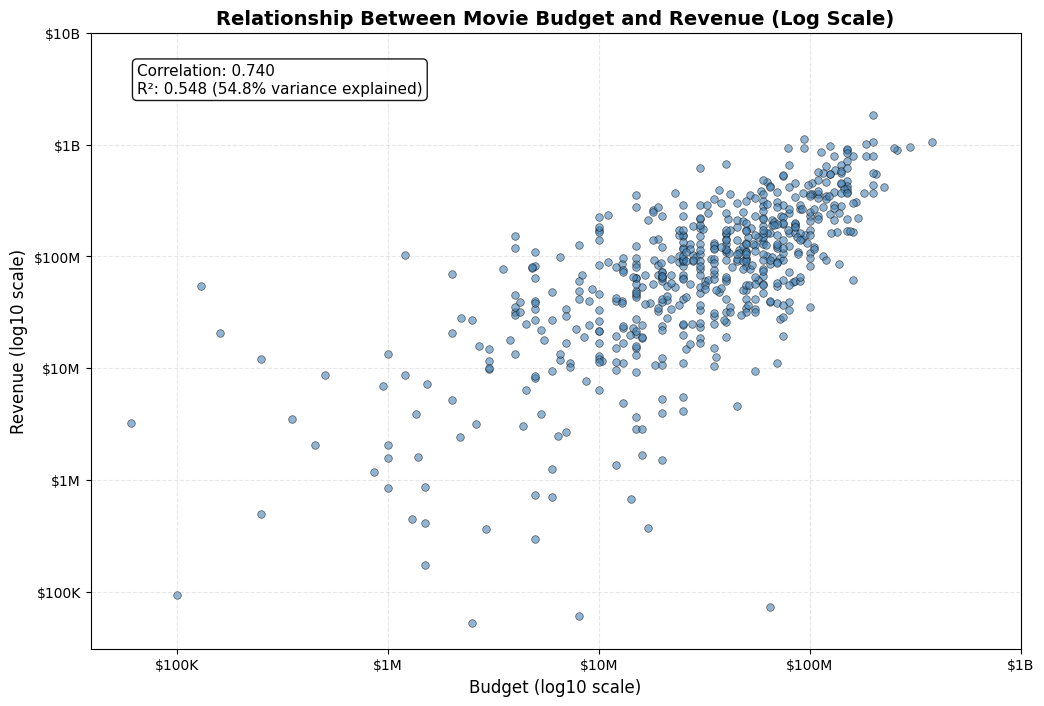

In [52]:
import matplotlib.pyplot as plt

graph_data = movie_feat_aligned[movie_feat_aligned['revenue'] > 50000]  # filter out very low revenue movies for clarity

plt.figure(figsize=(12, 8))

# use log scale for both axes (adding 1 to avoid log(0))
plt.scatter(np.log10(graph_data['budget'] + 1), 
            np.log10(graph_data['revenue'] + 1), 
            alpha=0.6, s=30, color='steelblue', edgecolors='black', linewidth=0.5)

# add labels and title
plt.xlabel('Budget (log10 scale)', fontsize=12)
plt.ylabel('Revenue (log10 scale)', fontsize=12)
plt.title('Relationship Between Movie Budget and Revenue (Log Scale)', 
          fontsize=14, fontweight='bold')

# set custom tick labels for better readability
budget_ticks = [1e5, 1e6, 1e7, 1e8, 1e9]  # 100K, 1M, 10M, 100M, 1B
revenue_ticks = [1e5, 1e6, 1e7, 1e8, 1e9, 1e10]  # 100K, 1M, 10M, 100M, 1B, 10B

plt.xticks(np.log10(budget_ticks))
plt.yticks(np.log10(revenue_ticks))

# format tick labels
plt.gca().set_xticklabels(['$100K', '$1M', '$10M', '$100M', '$1B'])
plt.gca().set_yticklabels(['$100K', '$1M', '$10M', '$100M', '$1B', '$10B'])

# add grid
plt.grid(True, alpha=0.3, linestyle='--')

# calculate and display correlation
correlation = movie_feat_aligned['budget'].corr(movie_feat_aligned['revenue'])
r_squared = correlation ** 2

# add correlation text box
stats_text = f'Correlation: {correlation:.3f}\nR²: {r_squared:.3f} ({r_squared*100:.1f}% variance explained)'
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

The graph above gives us some insight on the original question. We can see the coorelation between budget and revenue is 0.74 which shows a strong coorelation between the two features. It's not perfect, however it is significant. We can also see from the R^2 score, 54% of the variance is explained by this relation.

Another question I have is how this coorelation changes as budget increases.

To create a test, I am going to split the data into quartiles by budget. This way we can calculate the coorelation to revenue of each quartile independantly and see how it changes.

In [53]:
movie_data = movie_feat_aligned.copy()

# remove any zero or negative budgets/revenues for clean analysis
movie_data = movie_data[(movie_data['budget'] > 0) & (movie_data['revenue'] > 0)]

print("\nCorrelations by Budget Quartile:")
# spliting data into budget quartiles using pd.qcut
movie_data['budget_quartile'] = pd.qcut(movie_data['budget'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])
quartile_correlations = []

# calculate correlation for each quartile
for quartile in ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']:
    quartile_data = movie_data[movie_data['budget_quartile'] == quartile]
    corr = quartile_data['budget'].corr(quartile_data['revenue'])
    quartile_correlations.append((quartile, corr, len(quartile_data)))
    print(f"{quartile:12} | Correlation: {corr:.3f} | Movies: {len(quartile_data):,}")


Correlations by Budget Quartile:
Q1 (Lowest)  | Correlation: 0.318 | Movies: 165
Q2           | Correlation: 0.176 | Movies: 140
Q3           | Correlation: 0.127 | Movies: 144
Q4 (Highest) | Correlation: 0.569 | Movies: 144


So we can see here that there is more coorelation for movies with the highest of budgets. However, the second highest coorelation is in the lowest quartile, while the middle two quartiles have very low coorelation. This shows there there is strong coorelation at the extremes and a weak one in the middle. The revenue of movies around the median budget seems to be less affected by budget, and more affected by other factors.

Now I am curious how the other features correlate with revenue. To figure this out, I can take advantage of pandas built in .corr() function. To display, I will use a simple bar chart.

posx and posy should be finite values
posx and posy should be finite values


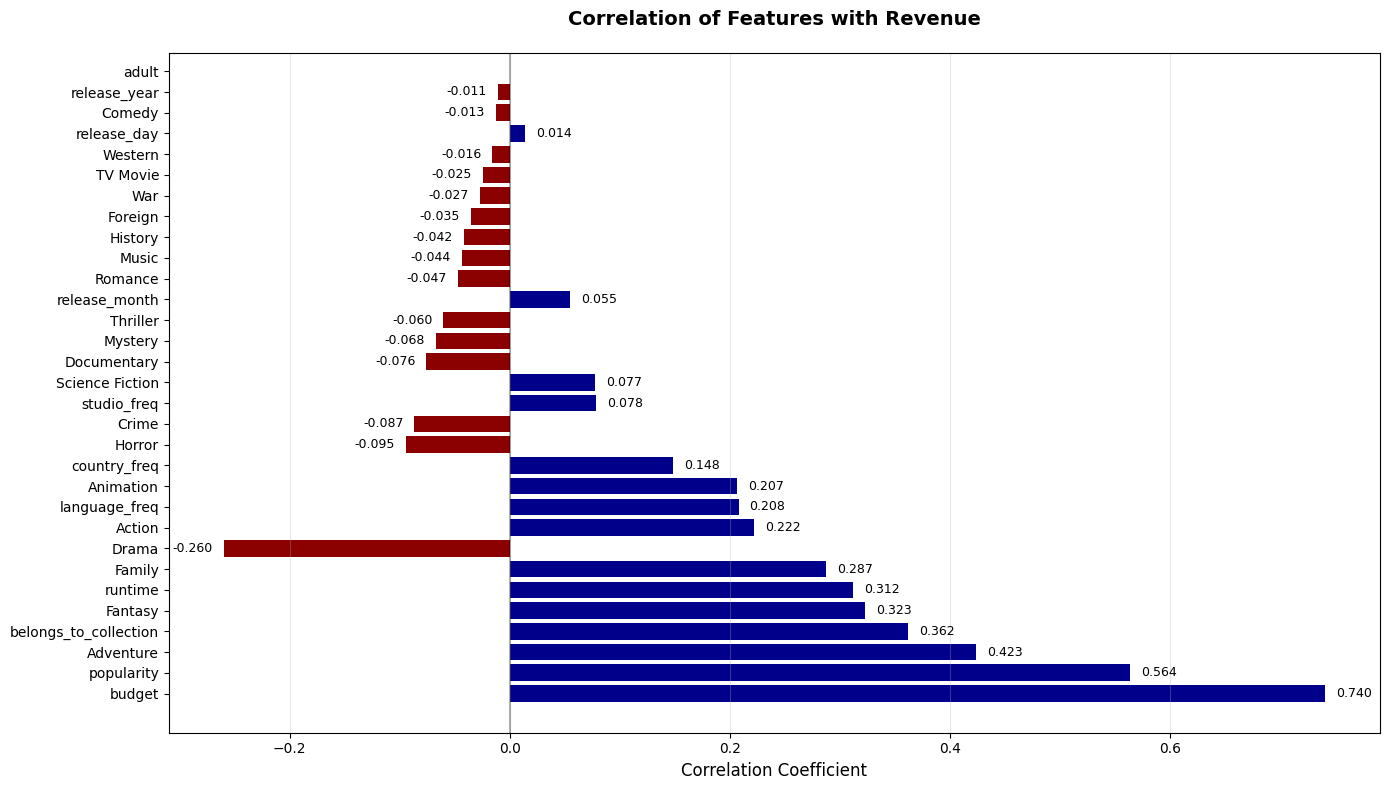

In [54]:
features_df = movie_feat_aligned.copy()

correlation_series = features_df.corr()['revenue'].sort_values(ascending=False)

# remove revenue from the list (it will be 1.0)
correlation_series = correlation_series[correlation_series.index != 'revenue']

# create a DataFrame for better display
correlation_df = pd.DataFrame({
    'Feature': correlation_series.index,
    'Correlation': correlation_series.values,
    'Absolute_Correlation': np.abs(correlation_series.values)
}).sort_values('Absolute_Correlation', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.barh(correlation_df['Feature'], correlation_df['Correlation'], 
                color=np.where(correlation_df['Correlation'] > 0, 'darkblue', 'darkred'))

plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Correlation of Features with Revenue', fontsize=14, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')

# add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01 if width >= 0 else -0.01), 
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', 
             ha='left' if width >= 0 else 'right', 
             va='center',
             fontsize=9)

plt.tight_layout()
plt.show()

So we can see from this plot above that budget seems to be the largest contributor to the revenue. However, some interesting coorelations are the genres. It seems like some genres tend to make more money (Adventure and fantasy being the most) and some decrease the revenue (Drama shows this dramaticaly).

Now that we've take a look at the relation of our features to the revenue of a movie, lets go ahead and build our model. 

## 4.) Building model

The next cell just forces tensorflow to use the cpu because my instilation of cuda is messed up and won't work with my gpu.

In [55]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force TensorFlow to use CPU

print(f"CUDA_VISIBLE_DEVICES: {os.environ.get('CUDA_VISIBLE_DEVICES', 'Not set')}")

CUDA_VISIBLE_DEVICES: -1


TensorFlow is a fantastic library that provides tools to build a custom neural network. We have to specify the architecture, learning rate, regularization rates, dropout, optimizer (We will use one called Adam), loss metrics (We will use MSE - Mean Squared Error), batch size, and number of epochs. I will do some experimenting to see what params give better results, but as to not make this project too long, I wont include that process.

In [56]:

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

print("=== Building Neural Network ===")
print("="*50)

# set random seed for reproducibility
tf.random.set_seed(42)

# create the model
print("Creating model...")

# inputs
user_input = layers.Input(shape=(1,), name='user_input')
movie_input = layers.Input(shape=(1,), name='movie_input')
features_input = layers.Input(shape=(X_features_train_scaled.shape[1],), name='features_input')

# embeddings (learn representations for users and movies)
user_embedding = layers.Embedding(input_dim=num_users, output_dim=32)(user_input)
movie_embedding = layers.Embedding(input_dim=num_movies, output_dim=32)(movie_input)

# flatten embeddings
user_vec = layers.Flatten()(user_embedding)
movie_vec = layers.Flatten()(movie_embedding)

# combine everything
combined = layers.Concatenate()([user_vec, movie_vec, features_input])

# hidden layers
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(combined)
x = layers.Dropout(0.4)(x)  # Prevent overfitting
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu')(x)

# output layer (predict rating 0.5-5.0)
output = layers.Dense(1)(x)

# create model
model = models.Model(inputs=[user_input, movie_input, features_input], outputs=output)

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error for metrics
)

# this provides a summary of the model architecture
print("Model summary:")
model.summary()

# train the model
print("\n" + "="*50)
print("Training model...")

history = model.fit(
    x=[X_user_train, X_movie_train, X_features_train_scaled],
    y=y_train,
    validation_data=([X_user_test, X_movie_test, X_features_val_scaled], y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

print("\nTraining complete!")

# quick evaluation
print("\n" + "="*50)
print("Final Evaluation:")

train_loss, train_mae = model.evaluate(
    [X_user_train, X_movie_train, X_features_train_scaled],
    y_train,
    verbose=0
)

test_loss, test_mae = model.evaluate(
    [X_user_test, X_movie_test, X_features_test_scaled],
    y_test,
    verbose=0
)

print(f"Training Loss (MSE): {train_loss:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

print(f"\nOn average, predictions are +/-{test_mae:.2f} stars from actual ratings")

2025-12-12 12:01:40.704222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-12 12:01:41.327978: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 12:01:44.342753: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64:/usr/local/cuda/lib64:/usr/local/cuda-11.8/lib64

=== Building Neural Network ===
Creating model...


2025-12-12 12:01:49.721674: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 32)        21376       ['user_input[0][0]']             
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 32)        22720       ['movie_input[0][0]']            
                                                                               

Ok sweet! So the model was able to achieve a pretty descent accuracy for the task. We can see at the end it says "On average, predictions are +/-0.74 stars from actual ratings". This shows that on average, we're less than 1 star off from the actual rating. For a rating system, I feel like this is pretty good. With parameter tuning, we would definately be able to improve the accuracy range. However, that might be outside the scope of this project.

Note: I actually did some research and found that Netflix's recomendation system had about a 0.75 MAE in their early days. So that means we did pretty good i guess.

Lets print out some graphs to visualize the training process for our model.

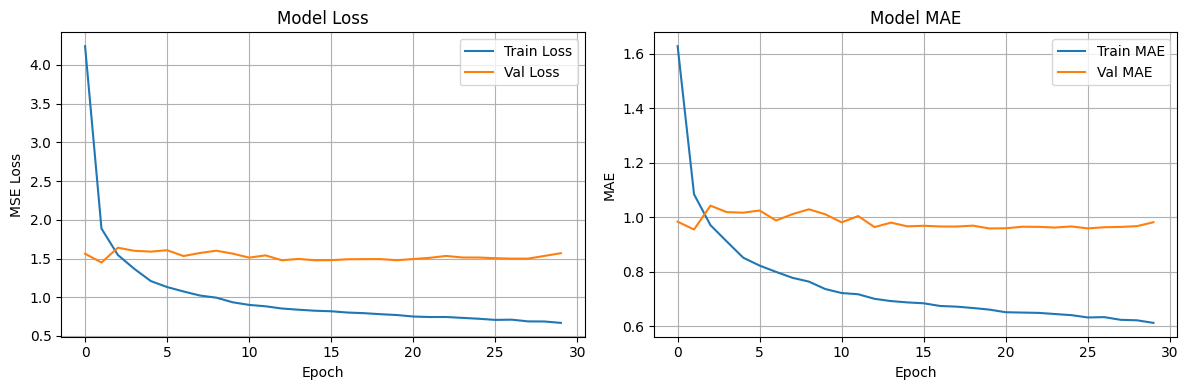

In [57]:
import matplotlib.pyplot as plt

# plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].legend()
axes[0].grid(True)

# MAE plot
axes[1].plot(history.history['mae'], label='Train MAE')
axes[1].plot(history.history['val_mae'], label='Val MAE')
axes[1].set_title('Model MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

The first graph (left) is the model loss (represented by MSE). The second graph (right) represents the MAE (Mean Absolute Error). We will also overlay the loss/MAE during training with the loss/MAE during validation.

This data tracks with a normal loss/MAE patern while training and validating a model.